# ITMAL Øvelser – Dataanalyse

## Exercise 1
I skal analysere på ”California housing prices” (https://www.kaggle.com/camnugent/california-housingprices), som også benyttes i lærebogen.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a) Plot fordelingen af median_income. Find også spredning, middelværdi og median

In [2]:
# Imports
from sklearn.datasets.california_housing import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import os
import pandas as pd

In [3]:
# Preparation
cal_dataset_path = "./housing.csv"

cal_housing = pd.read_csv(cal_dataset_path)
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
cal_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Fetch data
#cal_housing = fetch_california_housing()

#feat_names = cal_housing.feature_names
#print(feat_names)

In [6]:
# get median income, seperate the target and data
#cal_housing_data_x = cal_housing.data
med_inc = cal_housing["median_income"]
#avg_house_val_y = cal_housing.target
print(med_inc)

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64


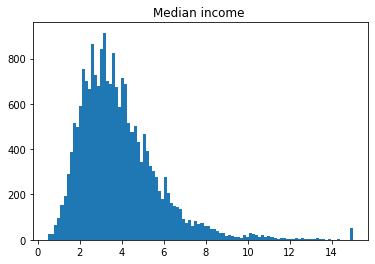

In [7]:
title = "Median income "

plt.hist(med_inc, bins=100)
plt.title(title)
plt.show()

In [8]:
mean = med_inc.mean()
median = med_inc.median()
std = med_inc.std()
print(mean)
print(median)
print(std)

3.8706710029070246
3.5347999999999997
1.8998217179452732


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b) Er der forskel på median og middelværdi af median_income ? Hvilken af de to beskriver bedst
en ”almindelig families indkomst” og hvorfor ?

Ja der er forskel. Middelværdien er jo gennemsnittet af det data der regnes på, hvor medianen er jo "det midterste tal". 
Hvis dataen ikke er normalfordelt, vil det være hensigtsmæssigt at bruge medianen til at beskrive den almindelige tendes for det data.
Altså i som i dette datasæt, vil det være bedst at bruge medianen til at beskrive en almindelig families indkomst, da middelværdien
får en indflydelse fra de punkter der varierer meget fra middelværdien. Medianen vil derfor være bedre til at vise den almindelige
families indkomst i dette tilfælde, da den ikke er afhængig af de ydre punkter.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c) Fit en normalfordeling til data og plot histogrammet – passer de to ?

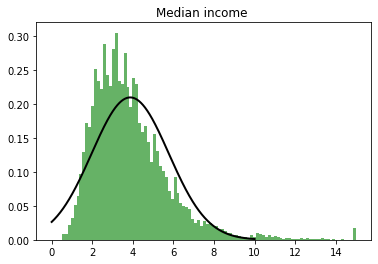

In [9]:
from scipy.stats import norm

#X_min and max is missing
fit_norm = norm.fit(med_inc)
plt.hist(med_inc, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF
x = np.linspace(0, 10, med_inc.size)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; d) Er der sammenhæng imellem median_house_value og median_income ? Lav korrelationsplot.

[0, 16, 0, 550000]

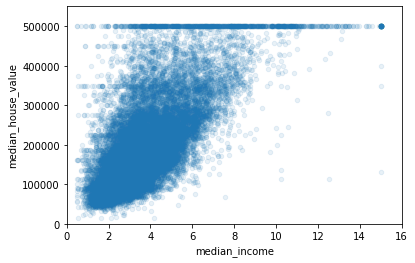

In [14]:
cal_housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

Der er en hvis correlation, da det ses at der er en tendens til at jo mere kapital der er i hjemmet, jo mere stiger hus værdien
også. Det ses dog også at der er en afvigelse, men der kan opstilles en liniær regression, hvor det kan ses hvor godt modellen fitter
til data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e) Hvad er 5% og 95% percentilerne af median_house_value ? (dvs. grænserne for 5% laveste og
højeste). Plot også fordelingen af median_house_value. Kommentér på realismen af max-værdi
og 95% percentil – foreslå gerne en løsning til hvad man kan gøre ved dette, hvis man skal have
mere realistiske data

In [11]:
med_house_val = cal_housing["median_house_value"]
five_per_quan = med_house_val.quantile(0.05)
ninetyfive_per_quan = med_house_val.quantile(0.95)
print(five_per_quan)
print(ninetyfive_per_quan)

66200.0
489809.9999999998


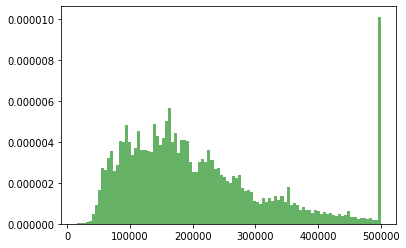

In [15]:
#fit_norm = norm.fit(med_house_val)
plt.hist(med_house_val, bins=100, density=True, alpha=0.6, color='g')
plt.show()

Som man kan se ud fra histogrammet, så er der mange punkter hvor husværdien ligger på 500.000, og det er også der, 
hvor størstedelen af punkterne er under. Det tyder på at der er blevet sat en maksimal værdi på datasættet, altså selvom der har
været hus værdier på over denne maksimal værdi, så tyder det på at man har valgt at tage alle værdier som ligger over denne 
maksimale værdi og sat den lig med det. 95% percentil værdien ses også at være meget påvirket af denne fordeling, da der netop
mange punkter under max-værdien, hvor 95% percentil værdien hælder meget over til max vædien og de højere hus priser. 

Max-værdien er også lavt sat, da man hurtigt kan finde hus priser til en værdi af mere end den nuværende maksimale værdi 
fra datasættet, og det virker urealtistisk at man kan finde mange huse til netop den maksimale værdi eller tæt på, da california
også er kendt som et sted hvor priserne kan blive ret høje.

// NB !!!! Hvad mere???
En ting man ville kunne gøre, er at tage en diskussion om at hæve grænseværdien/maksimal værdien så den overstiger den nuværende. 
Derved opnår man en bredere fordeling i modellerne, og mere realistisk. Det kan være at man enten skal fjerne grænseværdien helt
eller sætte den til en højere værdi. Det vil være afhængig af hvor meget de punkter vil betyde for datasættet og udregningerne. 
